# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

**En este proyecto analizaremos a la empresa Megaline. Específicamente, tenemos interés en saber la preferencia de los usuarios entre los planes Surf y Ultimate.**

Para llevar a cabo este análisis lo que haremos será:
* Extraer los datos a nuestra área de trabajo (Jupyterhub)
* Limpiar los datos (analizar si hay valores en blanco, nulos. También verificar si hay duplicados)
* Transformación de los datos (para poder realizar nuestros análisis, necesitaremos: combinar tablas, agrupar las tablas de manera específica, extraer cierta información de las tablas asi como meses específicos)
* Luego, comenzaremos con los análisis estadísticos. Nuestro objetivo es determinar: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere; El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

## Inicialización

In [19]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt

## Cargar datos

In [20]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("/datasets/megaline_users.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [21]:
print("Users:")
users.info()
print()
print("Plans:")
plans.info()
print()
print("Messages:")
messages.info()
print()
print("Internet:")
internet.info()
print()
print("Calls:")
calls.info()
print()

Users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Plans:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb   

## Tarifas

In [22]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [23]:
# Imprime una muestra de los datos para las tarifas
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Podemos ver que en la tabla "Plans", la columna 2 'mb_per_month_included', está en MB pero la empresa cobra en GB. Los datos se convertiran a GB. Asi tambien, para facilitar nuestros análisis, utilizaremos la columna 'plan_name' como índice.*

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
# Convertir MB a GB (redondeo hacia arriba porque la empresa cobra GB completos)
plans["gb_per_month_included"] = np.ceil(plans["mb_per_month_included"] / 1024)

# Recalcular el costo por GB
#plans["calculated_usd_per_gb"] = plans["usd_monthly_pay"] / plans["gb_per_month_included"]

# Comparar los valores calculados con los originales
#print(plans[["plan_name", "usd_per_gb", "calculated_usd_per_gb"]])


#plans = plans.set_index("plan_name")
plans.info()
print(plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute p

Para facilitar la lectura de los datos, fijamos los nombres de los planes como índice.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
calculated_usd_per_gb = plans["usd_monthly_pay"] / plans["gb_per_month_included"]
print(calculated_usd_per_gb)
print()
difference = plans["usd_per_gb"] - calculated_usd_per_gb
print(difference)
print()
print(plans.head())

0    1.333333
1    2.333333
dtype: float64

0    8.666667
1    4.666667
dtype: float64

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


Basados en los cálculos que hemos hecho, podemos ver que el costo de dólares por GB fue asignado de una manera específica. Por cuestiones de realizar el ejercicio, se decide continuar con los precios fijados por la empresa.

Pero sería interesante descubrir en base a que fijan los precios.

## Usuarios/as

In [26]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [27]:
# Imprime una muestra de datos para usuarios
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
99,1099,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,NaN
122,1122,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,surf,NaN
419,1419,Bryon,Gordon,45,"Phoenix-Mesa-Chandler, AZ MSA",2018-03-29,surf,NaN
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaN
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaN
475,1475,Arlen,Sutton,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-05-28,ultimate,NaN
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-03-06,ultimate,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [28]:
users["reg_date"] = pd.to_datetime(users["reg_date"],format='%Y-%m-%d')
users["churn_date"] = pd.to_datetime(users["churn_date"],format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [29]:
#print(users.duplicated().sum())

status_list = []
for value in users["churn_date"]:
    if pd.isna(value):
        status_list.append("continues")
    else:
        status_list.append("finished")

#print(status_list)
users["status"] = status_list
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date     status  
0 2018-12-24  ultimate        NaT  continues  
1 2018-08-13      surf        NaT  continues  
2 2018-10-21      surf        NaT  continues  
3 2018-01-28      surf        NaT  continues  
4 2018-05-23      surf        NaT  continues  


Aquí hemos:

* Cambiado reg_date y churn_date a datetime (en el momento de los cálculos, será más fácil)
* Revisado si existían duplicados (el resultado salió cero)
* Los espacios en blanco en churn_date, para evitar alteraciones en los cálculos, se dejaron en blanco. Es por eso que se agregó una nueva columna (status), para saber si el usuario sigue o ya finalizó su plan.

## Llamadas

In [30]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [31]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(10))
print()
print(calls["user_id"].duplicated().sum())
print(calls["call_date"].duplicated().sum())
print()
print(calls["duration"].describe())
print()
print(calls[calls["duration"]<0])


              id  user_id   call_date  duration
25839   1099_159     1099  2018-05-16     16.09
49582   1179_241     1179  2018-10-26      0.27
133911   1487_20     1487  2018-12-18      0.00
19512   1073_380     1073  2018-12-04      3.10
88267   1324_315     1324  2018-09-28     11.51
64857   1236_125     1236  2018-10-07     17.36
133868  1486_216     1486  2018-12-11      7.42
60080    1216_65     1216  2018-12-20      0.00
41450    1153_88     1153  2018-07-09      6.83
87502   1321_134     1321  2018-06-23     16.19

137254
137384

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Podemos ver que:

* el tipo de dato de la fecha es object, lo vamos a cambiar a datetime
* no hay duplicados, los que vemos ahí pueden significar únicamente que el mismo user_id hizo más de una llamada el mismo día
* la duración mínima de una llamada es de 0.0 (verificamos si hay valores negativos y no hay).
* la duración máxima de una llamada puede ser der 37 minutos. No es un valor atípico.
* Para facilitar análisis, podemos dividir la columna de fechas en mes, día, y año.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [32]:
calls["call_date"]=pd.to_datetime(calls["call_date"])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [33]:
calls['year']=calls['call_date'].dt.year
calls['month']=calls['call_date'].dt.month
calls['day'] = calls['call_date'].dt.day
calls['weekday']=calls['call_date'].dt.day_name()

print(calls.head())

         id  user_id  call_date  duration  year  month  day   weekday
0   1000_93     1000 2018-12-27      8.52  2018     12   27  Thursday
1  1000_145     1000 2018-12-27     13.66  2018     12   27  Thursday
2  1000_247     1000 2018-12-27     14.48  2018     12   27  Thursday
3  1000_309     1000 2018-12-28      5.76  2018     12   28    Friday
4  1000_380     1000 2018-12-30      4.22  2018     12   30    Sunday


## Mensajes

In [34]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(10))
print()
print(messages.duplicated().sum())
print(messages['user_id'].duplicated().sum())

             id  user_id message_date
60052  1381_165     1381   2018-12-21
69672   1454_34     1454   2018-09-27
50978  1331_153     1331   2018-12-11
36024   1237_45     1237   2018-10-29
18963   1123_32     1123   2018-12-21
61828  1385_292     1385   2018-07-15
10354  1076_805     1076   2018-11-16
21354  1132_657     1132   2018-10-01
49801  1328_759     1328   2018-09-25
4742   1044_112     1044   2018-09-22

0
75649


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Podemos ver

* la fecha tiene tipo object, lo cambiaremos a datetime
* no hay duplicados ni espacios en blanco
* para facilitar calculos, separaremos dia, mes, año
* podemos calcular la cantidad de mensajes que manda cada usuario

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [36]:
messages['message_date']= pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [37]:
messages['year']=messages['message_date'].dt.year
messages['month']=messages['message_date'].dt.month
messages['day']=messages['message_date'].dt.day
messages['day']=messages['message_date'].dt.day_name()

#print(messages.sample(10))
print()
messages_per_user = messages['user_id'].value_counts()
print(messages['user_id'],messages_per_user)



0        1000
1        1000
2        1000
3        1000
4        1000
         ... 
76046    1497
76047    1497
76048    1497
76049    1497
76050    1497
Name: user_id, Length: 76051, dtype: int64 1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1481       3
1477       3
1161       2
1323       1
1479       1
Name: user_id, Length: 402, dtype: int64


## Internet

In [38]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [39]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.sample(10))
print(internet.duplicated().sum())
print(internet['mb_used'].describe())

              id  user_id session_date  mb_used
2916    1016_128     1016   2018-11-05   346.93
3063    1017_103     1017   2018-09-08   409.86
61878    1281_84     1281   2018-08-20   148.26
62488   1286_489     1286   2018-12-25   501.05
38969   1174_232     1174   2018-10-20   690.74
43645    1194_63     1194   2018-11-06   353.42
79954    1374_30     1374   2018-06-20   172.16
8624    1045_208     1045   2018-11-25     0.00
101453  1483_268     1483   2018-11-08   107.17
92727   1433_111     1433   2018-10-28   870.38
0
count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Podemos ver:

* No hay duplicados
* No hay espacios en blanco
* Cambiaremos la fecha a datetime, y sacaremos mes, year y dia
* Podriamos agregar una nueva columna, para saber cuanto es en GB (ya que esta en mb)

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [40]:
internet['session_date']=pd.to_datetime(internet['session_date'])
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [41]:
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['day'] = internet['session_date'].dt.day
internet['weekday'] = internet['session_date'].dt.day_name()

internet['gb_used'] = internet['mb_used']/1024 

print(internet.sample(10))

             id  user_id session_date  mb_used  year  month  day    weekday  \
57686  1261_135     1261   2018-10-04   459.60  2018     10    4   Thursday   
91548   1422_79     1422   2018-12-29   509.16  2018     12   29   Saturday   
82070  1384_302     1384   2018-08-12   459.94  2018      8   12     Sunday   
5796   1031_476     1031   2018-08-30   370.04  2018      8   30   Thursday   
65925  1305_105     1305   2018-12-06   997.73  2018     12    6   Thursday   
36655  1164_338     1164   2018-11-28   281.39  2018     11   28  Wednesday   
71299  1332_272     1332   2018-10-09   508.15  2018     10    9    Tuesday   
95578  1445_226     1445   2018-06-24   218.21  2018      6   24     Sunday   
58093  1261_570     1261   2018-11-10   365.67  2018     11   10   Saturday   
42947  1191_126     1191   2018-08-26   257.13  2018      8   26     Sunday   

        gb_used  
57686  0.448828  
91548  0.497227  
82070  0.449160  
5796   0.361367  
65925  0.974346  
36655  0.274795  
7129

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [42]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [43]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_by_user = calls.groupby(["user_id","month"])["id"].count().reset_index()
calls_by_user.rename(columns={"user_id":"user_id","month":"month","id":"num_calls"}, inplace=True)

print(calls_by_user)

      user_id  month  num_calls
0        1000     12         16
1        1001      8         27
2        1001      9         49
3        1001     10         65
4        1001     11         64
...       ...    ...        ...
2253     1498     12         39
2254     1499      9         41
2255     1499     10         53
2256     1499     11         45
2257     1499     12         65

[2258 rows x 3 columns]


In [44]:
#pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                            #values='duration',  
                            #aggfunc=['sum','count']).reset_index()

#print(pivot_calls)

In [45]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_user = calls.groupby(["user_id","month"])["duration"].sum().reset_index()
minutes_per_user.rename(columns={"duration": "total_minutes"}, inplace=True)
print(minutes_per_user)

      user_id  month  total_minutes
0        1000     12         116.83
1        1001      8         171.14
2        1001      9         297.69
3        1001     10         374.11
4        1001     11         404.59
...       ...    ...            ...
2253     1498     12         324.77
2254     1499      9         330.37
2255     1499     10         363.28
2256     1499     11         288.56
2257     1499     12         468.10

[2258 rows x 3 columns]


In [46]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.


messages_per_user = messages.groupby(["user_id", "month"])["id"].count().reset_index()
messages_per_user.rename(columns={"id":"num_messages"}, inplace=True)
print(messages_per_user)


      user_id  month  num_messages
0        1000     12            11
1        1001      8            30
2        1001      9            44
3        1001     10            53
4        1001     11            36
...       ...    ...           ...
1801     1496      9            21
1802     1496     10            18
1803     1496     11            13
1804     1496     12            11
1805     1497     12            50

[1806 rows x 3 columns]


In [47]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#print(internet.head())

mb_used_per_user = internet.groupby(["user_id","month"])["mb_used"].sum().reset_index()
mb_used_per_user.rename(columns={"mb_used":"total_mb_used"}, inplace=True)
print(mb_used_per_user)

      user_id  month  total_mb_used
0        1000     12        1901.47
1        1001      8        6919.15
2        1001      9       13314.82
3        1001     10       22330.49
4        1001     11       18504.30
...       ...    ...            ...
2272     1498     12       23137.69
2273     1499      9       12984.76
2274     1499     10       19492.43
2275     1499     11       16813.83
2276     1499     12       22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [48]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Merge calls and minutes
calls_data = pd.merge(calls_by_user, minutes_per_user, on=["user_id", "month"], how="outer")

# Merge with messages
calls_messages_data = pd.merge(calls_data, messages_per_user, on=["user_id", "month"], how="outer")

# Merge with internet data
final_data = pd.merge(calls_messages_data, mb_used_per_user, on=["user_id", "month"], how="outer")

# Check the final merged dataset
print(final_data.head())



   user_id  month  num_calls  total_minutes  num_messages  total_mb_used
0     1000     12       16.0         116.83          11.0        1901.47
1     1001      8       27.0         171.14          30.0        6919.15
2     1001      9       49.0         297.69          44.0       13314.82
3     1001     10       65.0         374.11          53.0       22330.49
4     1001     11       64.0         404.59          36.0       18504.30


In [49]:
# Añade la información de la tarifa
user_data = pd.merge(users,final_data,on="user_id",how="outer")
#print(user_data.head())
#print()
#print(plans)
plans.rename(columns={"plan_name":"plan"}, inplace=True)
#print()
#print(plans)
user_plan= pd.merge(user_data,plans,on="plan",how="left")
print(user_plan)

      user_id first_name   last_name  age  \
0        1000   Anamaria       Bauer   45   
1        1001     Mickey   Wilkerson   28   
2        1001     Mickey   Wilkerson   28   
3        1001     Mickey   Wilkerson   28   
4        1001     Mickey   Wilkerson   28   
...       ...        ...         ...  ...   
2298     1498       Scot  Williamson   51   
2299     1499      Shena     Dickson   37   
2300     1499      Shena     Dickson   37   
2301     1499      Shena     Dickson   37   
2302     1499      Shena     Dickson   37   

                                           city   reg_date      plan  \
0         Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
3               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
4               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
...                        

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [50]:
print(plans.info())
print()
#print(user_data.head())
print()
print(user_plan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2

In [57]:
# Calcula el ingreso mensual para cada usuario
#first code


# Calculate extra usage
user_plan["extra_minutes"] = user_plan["total_minutes"] - user_plan["minutes_included"]
user_plan["extra_messages"] = user_plan["num_messages"] - user_plan["messages_included"]
user_plan["extra_mb"] = user_plan["total_mb_used"] - user_plan["mb_per_month_included"]
user_plan["extra_gb"] = user_plan["extra_mb"] / 1024


# Ensure we only charge for extra usage (if negative, set to 0)
user_plan["extra_minutes"] = user_plan["extra_minutes"].apply(lambda x: max(x, 0))
user_plan["extra_messages"] = user_plan["extra_messages"].apply(lambda x: max(x, 0))
user_plan["extra_gb"] = user_plan["extra_gb"].apply(lambda x: max(x, 0))

# Calculate extra charges
user_plan["extra_minutes_cost"] = user_plan["extra_minutes"] * user_plan["usd_per_minute"]
user_plan["extra_messages_cost"] = user_plan["extra_messages"] * user_plan["usd_per_message"]
user_plan["extra_mb_cost"] = user_plan["extra_gb"] * user_plan["usd_per_gb"]

# Make sure these charges are 0 if there’s no extra usage
user_plan["extra_minutes_cost"] = user_plan["extra_minutes_cost"].apply(lambda x: 0 if x < 0 else x)
user_plan["extra_messages_cost"] = user_plan["extra_messages_cost"].apply(lambda x: 0 if x < 0 else x)
user_plan["extra_mb_cost"] = user_plan["extra_mb_cost"].apply(lambda x: 0 if x < 0 else x)

# Total revenue per user per month
user_plan["total_revenue"] = (
    user_plan["usd_monthly_pay"]
    + user_plan["extra_minutes_cost"]
    + user_plan["extra_messages_cost"]
    + user_plan["extra_mb_cost"]
)

user_plan["total_revenue"] = user_plan["total_revenue"].fillna(user_plan["usd_monthly_pay"])

# Display final revenue data
print(user_plan[["user_id", "month", "total_revenue"]])

user_plan.info()

      user_id  month  total_revenue
0        1000   12.0      70.000000
1        1001    8.0      20.000000
2        1001    9.0      20.000000
3        1001   10.0      88.161191
4        1001   11.0      50.706055
...       ...    ...            ...
2298     1498   12.0      20.000000
2299     1499    9.0      20.000000
2300     1499   10.0      20.000000
2301     1499   11.0      20.000000
2302     1499   12.0      20.000000

[2303 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   reg_date          

In [58]:
# Calcula el ingreso mensual para cada usuario
#new code

# Round call duration to the nearest whole number
user_plan["total_minutes"] = user_plan["total_minutes"].round()

# Round megabytes to gigabytes before computing extra usage
user_plan["gb_per_month_included"] = (user_plan["mb_per_month_included"] / 1024).round()

# Calculate extra usage
user_plan["extra_minutes"] = user_plan["total_minutes"] - user_plan["minutes_included"]
user_plan["extra_messages"] = user_plan["num_messages"] - user_plan["messages_included"]
user_plan["extra_mb"] = user_plan["total_mb_used"] - user_plan["mb_per_month_included"]
user_plan["extra_gb"] = (user_plan["extra_mb"] / 1024).round()  # Round after conversion

# Ensure we only charge for extra usage (if negative, set to 0)
user_plan["extra_minutes"] = user_plan["extra_minutes"].apply(lambda x: max(x, 0))
user_plan["extra_messages"] = user_plan["extra_messages"].apply(lambda x: max(x, 0))
user_plan["extra_gb"] = user_plan["extra_gb"].apply(lambda x: max(x, 0))

# Calculate extra charges
user_plan["extra_minutes_cost"] = user_plan["extra_minutes"] * user_plan["usd_per_minute"]
user_plan["extra_messages_cost"] = user_plan["extra_messages"] * user_plan["usd_per_message"]
user_plan["extra_mb_cost"] = user_plan["extra_gb"] * user_plan["usd_per_gb"]

# Make sure these charges are 0 if there’s no extra usage
user_plan["extra_minutes_cost"] = user_plan["extra_minutes_cost"].apply(lambda x: max(x, 0))
user_plan["extra_messages_cost"] = user_plan["extra_messages_cost"].apply(lambda x: max(x, 0))
user_plan["extra_mb_cost"] = user_plan["extra_mb_cost"].apply(lambda x: max(x, 0))

# Total revenue per user per month
user_plan["total_revenue"] = (
    user_plan["usd_monthly_pay"]
    + user_plan["extra_minutes_cost"]
    + user_plan["extra_messages_cost"]
    + user_plan["extra_mb_cost"]
)

user_plan["total_revenue"] = user_plan["total_revenue"].fillna(user_plan["usd_monthly_pay"])

# Display final revenue data
print(user_plan[["user_id", "month", "total_revenue"]])

user_plan.info()


      user_id  month  total_revenue
0        1000   12.0          70.00
1        1001    8.0          20.00
2        1001    9.0          20.00
3        1001   10.0          90.09
4        1001   11.0          50.00
...       ...    ...            ...
2298     1498   12.0          20.00
2299     1499    9.0          20.00
2300     1499   10.0          20.00
2301     1499   11.0          20.00
2302     1499   12.0          20.00

[2303 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   reg_date          

In [65]:
print(user_plan[["total_minutes", "num_messages", "total_mb_used","num_calls"]].isnull().sum())

total_minutes     0
num_messages      0
total_mb_used     0
num_calls        45
dtype: int64


Los valores NaN en total_minutes, num_messages y total_mb_used pueden indicar que algunos usuarios no usaron esos servicios en ciertos meses.

In [66]:
user_plan["total_minutes"].fillna(0, inplace=True)
user_plan["num_messages"].fillna(0, inplace=True)
user_plan["total_mb_used"].fillna(0, inplace=True)
user_plan["num_calls"].fillna(0, inplace=True)

In [68]:
# run the new code again
#new code

# Round call duration to the nearest whole number
user_plan["total_minutes"] = user_plan["total_minutes"].round()

# Round megabytes to gigabytes before computing extra usage
user_plan["gb_per_month_included"] = (user_plan["mb_per_month_included"] / 1024).round()

# Calculate extra usage
user_plan["extra_minutes"] = user_plan["total_minutes"] - user_plan["minutes_included"]
user_plan["extra_messages"] = user_plan["num_messages"] - user_plan["messages_included"]
user_plan["extra_mb"] = user_plan["total_mb_used"] - user_plan["mb_per_month_included"]
user_plan["extra_gb"] = (user_plan["extra_mb"] / 1024).round()  # Round after conversion

# Ensure we only charge for extra usage (if negative, set to 0)
user_plan["extra_minutes"] = user_plan["extra_minutes"].apply(lambda x: max(x, 0))
user_plan["extra_messages"] = user_plan["extra_messages"].apply(lambda x: max(x, 0))
user_plan["extra_gb"] = user_plan["extra_gb"].apply(lambda x: max(x, 0))

# Calculate extra charges
user_plan["extra_minutes_cost"] = user_plan["extra_minutes"] * user_plan["usd_per_minute"]
user_plan["extra_messages_cost"] = user_plan["extra_messages"] * user_plan["usd_per_message"]
user_plan["extra_mb_cost"] = user_plan["extra_gb"] * user_plan["usd_per_gb"]

# Make sure these charges are 0 if there’s no extra usage
user_plan["extra_minutes_cost"] = user_plan["extra_minutes_cost"].apply(lambda x: max(x, 0))
user_plan["extra_messages_cost"] = user_plan["extra_messages_cost"].apply(lambda x: max(x, 0))
user_plan["extra_mb_cost"] = user_plan["extra_mb_cost"].apply(lambda x: max(x, 0))

# Total revenue per user per month
user_plan["total_revenue"] = (
    user_plan["usd_monthly_pay"]
    + user_plan["extra_minutes_cost"]
    + user_plan["extra_messages_cost"]
    + user_plan["extra_mb_cost"]
)

user_plan["total_revenue"] = user_plan["total_revenue"].fillna(user_plan["usd_monthly_pay"])

# Display final revenue data
print(user_plan[["user_id", "month", "total_revenue"]])

user_plan.info()


      user_id  month  total_revenue
0        1000   12.0          70.00
1        1001    8.0          20.00
2        1001    9.0          20.00
3        1001   10.0          90.09
4        1001   11.0          50.00
...       ...    ...            ...
2298     1498   12.0         100.00
2299     1499    9.0          20.00
2300     1499   10.0          60.00
2301     1499   11.0          30.00
2302     1499   12.0          90.00

[2303 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   reg_date          


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

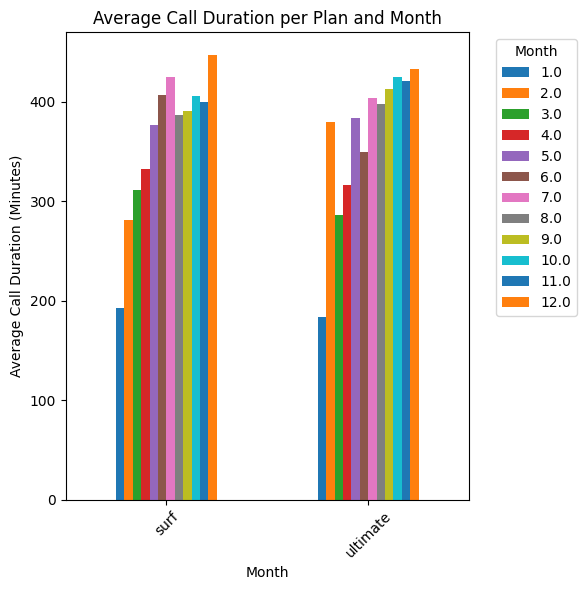

In [88]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

num_calls_avg = user_plan.groupby(["plan","month"])["total_minutes"].mean()
#print(num_calls_avg)

#num_calls_avg.plot(x='month',y='total_minutes',legend='plan',title='Duracion promedio de llamadas', color='pink',kind='bar')

# Plotting the results
# Since the data has a MultiIndex (plan and month), we'll use a bar plot with the MultiIndex labels
num_calls_avg.unstack().plot(kind='bar', figsize=(6, 6))

# Adding labels and title to the plot
plt.title('Average Call Duration per Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (Minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot

# Show the plot
plt.tight_layout()
plt.show()


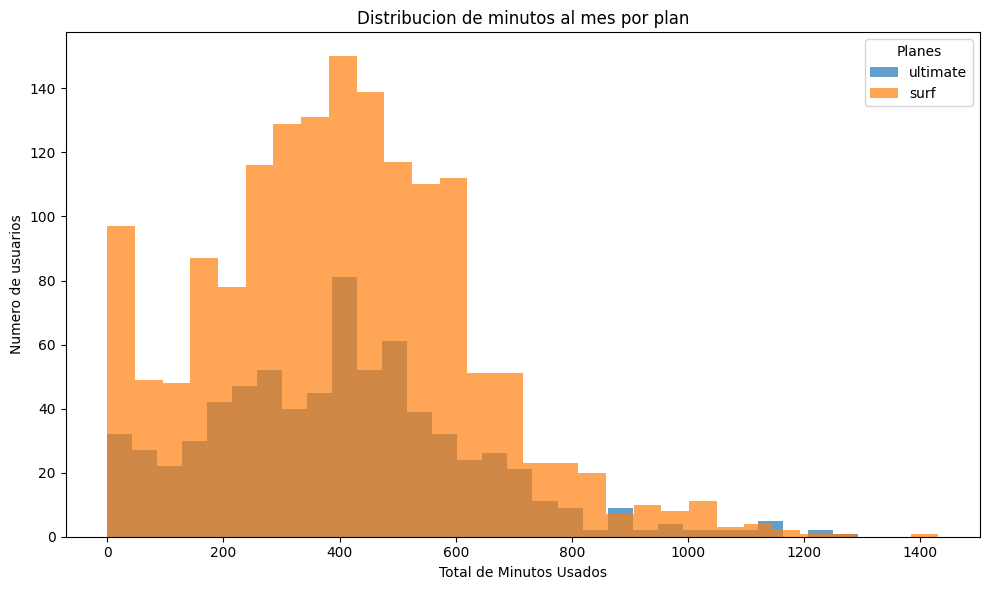

In [89]:
#Histograma 'Distribucion de minutos al mes por plan'
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plotting the histogram of total minutes for all users in each plan
for plan in user_plan['plan'].unique():
    # Filter the data for each plan
    plan_data = user_plan[user_plan['plan'] == plan]
    
    # Plotting the histogram for total minutes used in this plan
    plt.hist(plan_data['total_minutes'], bins=30, alpha=0.7, label=plan)

# Adding labels and title
plt.title('Distribucion de minutos al mes por plan')
plt.xlabel('Total de Minutos Usados')
plt.ylabel('Numero de usuarios')
plt.legend(title="Planes")

# Show the plot
plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [90]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#user_plan.info()

calls_avg = user_plan.groupby(["month","plan"])["total_minutes"].mean()
calls_var = user_plan.groupby(["month","plan"])["total_minutes"].var()

print("La media de la duracion mensual de llamadas:")
print(calls_avg)
print()
print("La varianza de la duracion mensual de llamadas:")
print(calls_var)

La media de la duracion mensual de llamadas:
month  plan    
1.0    surf        193.000000
       ultimate    183.250000
2.0    surf        280.888889
       ultimate    379.714286
3.0    surf        310.913043
       ultimate    285.750000
4.0    surf        332.360000
       ultimate    316.428571
5.0    surf        377.038961
       ultimate    383.586207
6.0    surf        407.206186
       ultimate    349.702128
7.0    surf        424.504132
       ultimate    403.762712
8.0    surf        387.172840
       ultimate    397.309859
9.0    surf        390.974227
       ultimate    413.302326
10.0   surf        405.683544
       ultimate    425.132075
11.0   surf        399.604240
       ultimate    420.480315
12.0   surf        447.452830
       ultimate    432.993377
Name: total_minutes, dtype: float64

La varianza de la duracion mensual de llamadas:
month  plan    
1.0    surf        14792.000000
       ultimate    14985.583333
2.0    surf        46963.861111
       ultimate    685

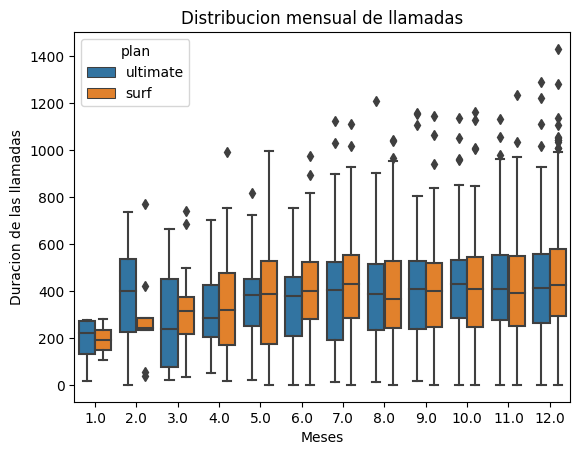

<Figure size 1000x600 with 0 Axes>

In [91]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
sns.boxplot(x='month',y='total_minutes',hue="plan",data=user_plan)

plt.xlabel('Meses')
plt.ylabel('Duracion de las llamadas')
plt.title('Distribucion mensual de llamadas')
plt.figure(figsize=[10,6])
plt.show()

#user_plan.info()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

* En base a la media de la duracion mensual de llamadas podemos deducir que hay una mayoria de personas que utiliza el plan surf. 

* En base al boxplot, no podemos concluir que el comportamiento de las llamadas varia en funcion del plan. Lo que si podemos ver es que la duracion de llamadas tiende a aumentar hacia los ultimos meses, e incluso las llamadas largas.

### Mensajes

In [73]:
user_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   reg_date               2303 non-null   datetime64[ns]
 6   plan                   2303 non-null   object        
 7   churn_date             160 non-null    datetime64[ns]
 8   status                 2303 non-null   object        
 9   month                  2293 non-null   float64       
 10  num_calls              2303 non-null   float64       
 11  total_minutes          2303 non-null   float64       
 12  num_messages           2303 non-null   float64       
 13  tot

In [92]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

message_group = user_plan.groupby(["month","plan"])["num_messages"].sum()
print(message_group)

month  plan    
1.0    surf           21.0
       ultimate       62.0
2.0    surf          108.0
       ultimate      151.0
3.0    surf          351.0
       ultimate      243.0
4.0    surf          870.0
       ultimate      463.0
5.0    surf         1849.0
       ultimate      931.0
6.0    surf         2454.0
       ultimate     1379.0
7.0    surf         3271.0
       ultimate     1937.0
8.0    surf         4662.0
       ultimate     2732.0
9.0    surf         5968.0
       ultimate     3259.0
10.0   surf         8020.0
       ultimate     4181.0
11.0   surf         9165.0
       ultimate     4903.0
12.0   surf        12275.0
       ultimate     6796.0
Name: num_messages, dtype: float64


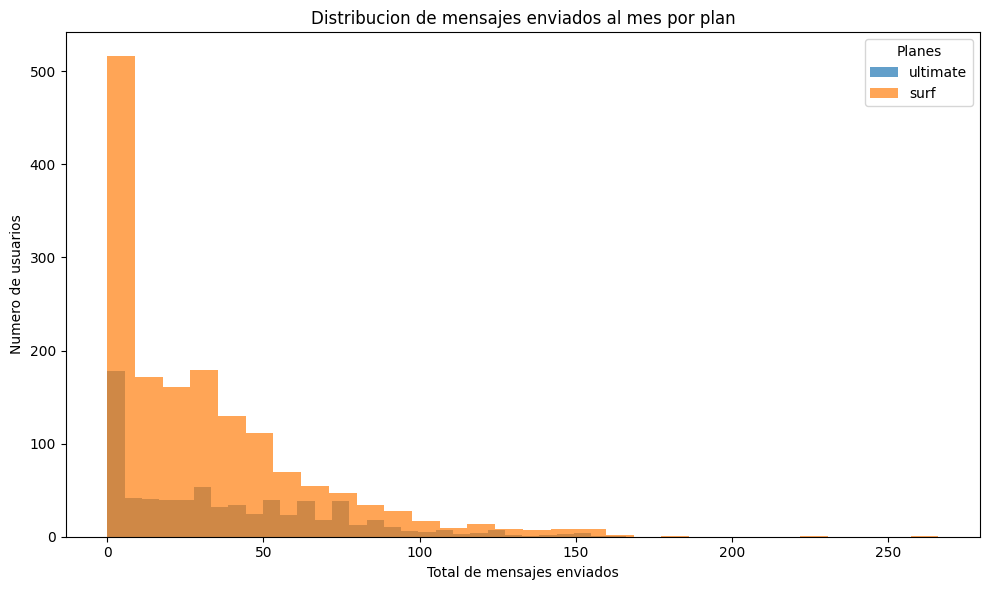

In [93]:
#Histograma 'Distribucion de  número de mensajes por plan'
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plotting the histogram of messages for all users in each plan
for plan in user_plan['plan'].unique():
    # Filter the data for each plan
    plan_data_message = user_plan[user_plan['plan'] == plan]
    
    # Plotting the histogram for total minutes used in this plan
    plt.hist(plan_data_message['num_messages'], bins=30, alpha=0.7, label=plan)

# Adding labels and title
plt.title('Distribucion de mensajes enviados al mes por plan')
plt.xlabel('Total de mensajes enviados')
plt.ylabel('Numero de usuarios')
plt.legend(title="Planes")

# Show the plot
plt.tight_layout()
plt.show()


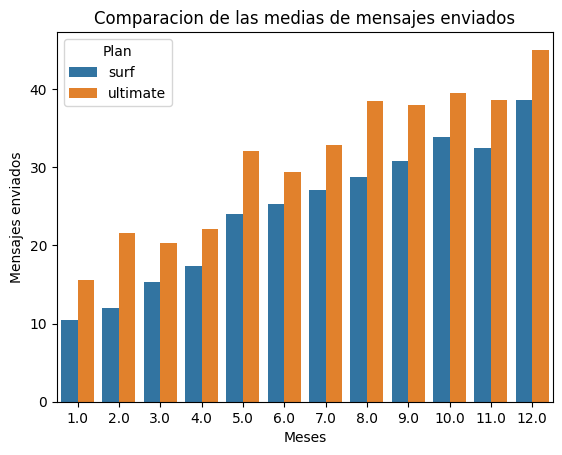

In [94]:
#analizar la media de mensajes enviados
import seaborn as sns
messages_mean=user_plan.groupby(["month","plan"])["num_messages"].mean().reset_index()
#print(messages_mean)


sns.barplot(x="month", y="num_messages", hue="plan", data=messages_mean)

plt.xlabel('Meses')
plt.ylabel('Mensajes enviados')
plt.title('Comparacion de las medias de mensajes enviados')
plt.legend(title='Plan')
plt.show()

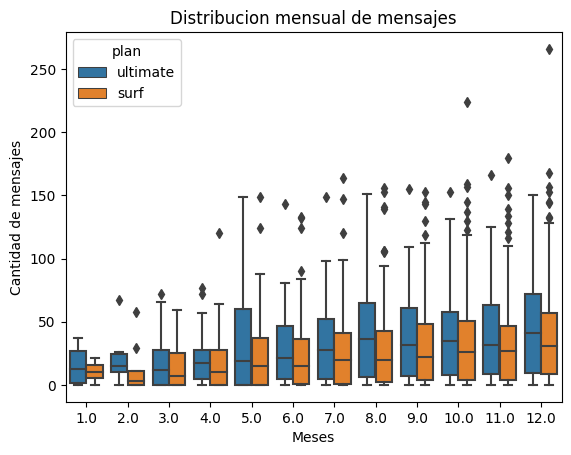

<Figure size 1000x600 with 0 Axes>

In [95]:
# Traza un diagrama de caja para visualizar la distribución mensual de mensajes
import seaborn as sns
sns.boxplot(x='month',y='num_messages',hue="plan",data=user_plan)

plt.xlabel('Meses')
plt.ylabel('Cantidad de mensajes')
plt.title('Distribucion mensual de mensajes')
plt.figure(figsize=[10,6])
plt.show()

#user_plan.info()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

* Al comparar las medias de los mensajes segun el plan, podemos ver que los usarios de ultimate han mandado mas mensajes. Esto no quiere decir que los usuarios esten mas activos, sino que el plan les permite mandar mas mensajes.

* Al hacer un boxplot de la cantidad de mensajes, podemos ver que en los primeros meses del año, la cantidad de mensajes enviados es menor que durante los últimos meses del año. Podemos ver que hay muchos valores atípicos a partir del 6to mes. Aún así, los patrones de uso no difieren demasiado el uno del otro.

* En el histograma de distribucion de  número de mensajes por plan, podemos ver que los clientes de surf son más activos. Aquí si el comportamiento varia según el plan.

### Internet

In [78]:
user_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   reg_date               2303 non-null   datetime64[ns]
 6   plan                   2303 non-null   object        
 7   churn_date             160 non-null    datetime64[ns]
 8   status                 2303 non-null   object        
 9   month                  2293 non-null   float64       
 10  num_calls              2303 non-null   float64       
 11  total_minutes          2303 non-null   float64       
 12  num_messages           2303 non-null   float64       
 13  tot

In [96]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_group=user_plan.groupby(['month','plan'])['total_mb_used'].sum()
print(internet_group)

month  plan    
1.0    surf           9749.72
       ultimate      27672.37
2.0    surf         109609.59
       ultimate     119901.66
3.0    surf         306945.12
       ultimate     219858.22
4.0    surf         599210.15
       ultimate     338554.75
5.0    surf        1073099.33
       ultimate     482109.99
6.0    surf        1484248.33
       ultimate     720882.29
7.0    surf        2030815.67
       ultimate     964339.92
8.0    surf        2720843.68
       ultimate    1264845.13
9.0    surf        3218737.67
       ultimate    1459408.78
10.0   surf        4102786.41
       ultimate    1866930.66
11.0   surf        4624009.00
       ultimate    2163278.04
12.0   surf        5766125.26
       ultimate    2766801.97
Name: total_mb_used, dtype: float64


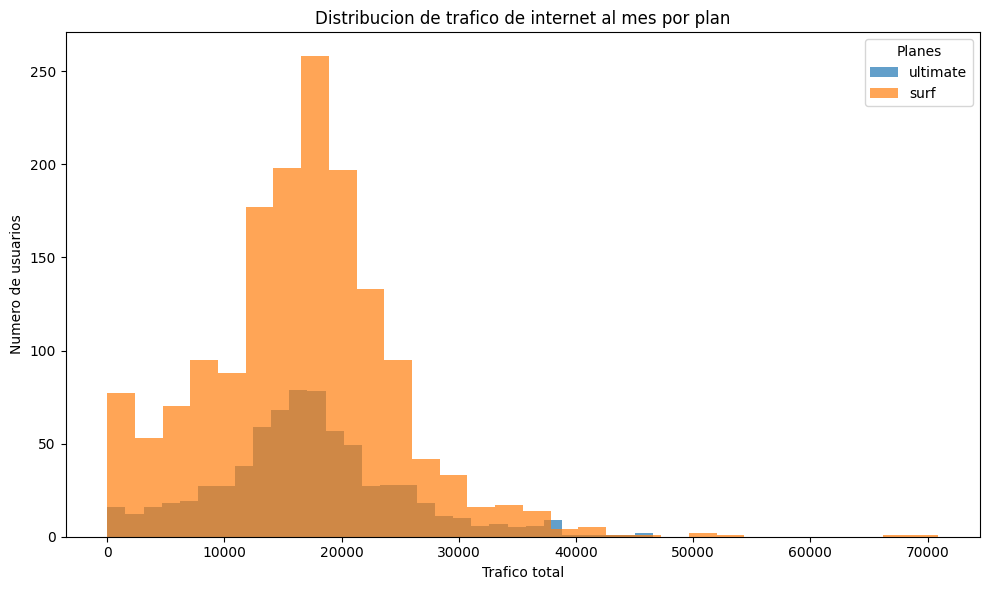

In [97]:
#Histograma 'Distribucion de trafico de internet por plan'
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plotting the histogram of messages for all users in each plan
for plan in user_plan['plan'].unique():
    # Filter the data for each plan
    plan_data_internet = user_plan[user_plan['plan'] == plan]
    
    # Plotting the histogram for total minutes used in this plan
    plt.hist(plan_data_internet['total_mb_used'], bins=30, alpha=0.7, label=plan)

# Adding labels and title
plt.title('Distribucion de trafico de internet al mes por plan')
plt.xlabel('Trafico total')
plt.ylabel('Numero de usuarios')
plt.legend(title="Planes")

# Show the plot
plt.tight_layout()
plt.show()

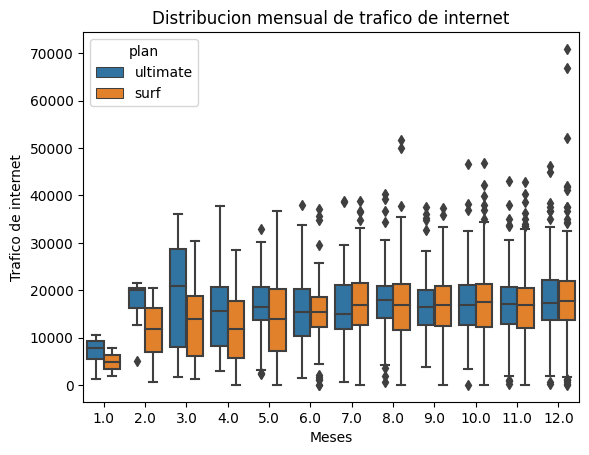

<Figure size 1000x600 with 0 Axes>

In [98]:
# Traza un diagrama de caja para visualizar la distribución mensual de trafico de internet
import seaborn as sns
sns.boxplot(x='month',y='total_mb_used',hue="plan",data=user_plan)

plt.xlabel('Meses')
plt.ylabel('Trafico de internet')
plt.title('Distribucion mensual de trafico de internet')
plt.figure(figsize=[10,6])
plt.show()

#user_plan.info()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

* Al comparar la cantidad de tráfico de Internet consumido por usuarios por plan, podemos ver que en varios meses, los clientes de surf han tenido mayor actividad. 
* El histograma tambien nos muestra que los clientes de surf han tenido mayor actividad. 
* El boxplot no muestra patrones de uso muy diferentes, pero si podemos ver que en los ultimos meses del año, hubo muchos valores atípicos.

Sí se puede ver una tendencia de los clientes de surf, pero no es 100% seguro que la actividad del cliente depende solo del plan que utilice.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [82]:
user_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   reg_date               2303 non-null   datetime64[ns]
 6   plan                   2303 non-null   object        
 7   churn_date             160 non-null    datetime64[ns]
 8   status                 2303 non-null   object        
 9   month                  2293 non-null   float64       
 10  num_calls              2303 non-null   float64       
 11  total_minutes          2303 non-null   float64       
 12  num_messages           2303 non-null   float64       
 13  tot

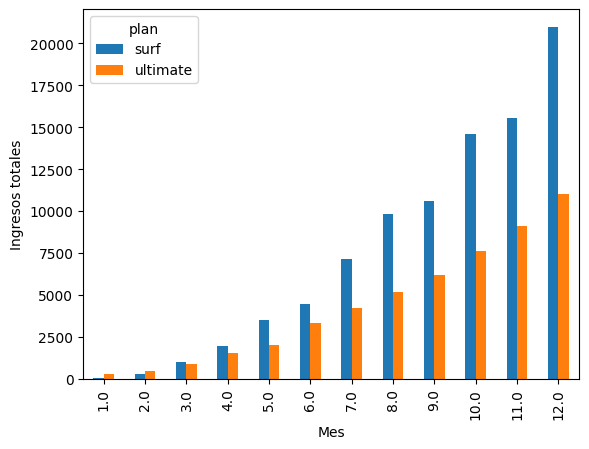

In [99]:
ingresos_group=user_plan.groupby(['month','plan'])['total_revenue'].sum().unstack()
#print(ingresos_group)

ingresos_group.plot(xlabel='Mes',ylabel='Ingresos totales',legend='Plan',kind='bar')
plt.show()

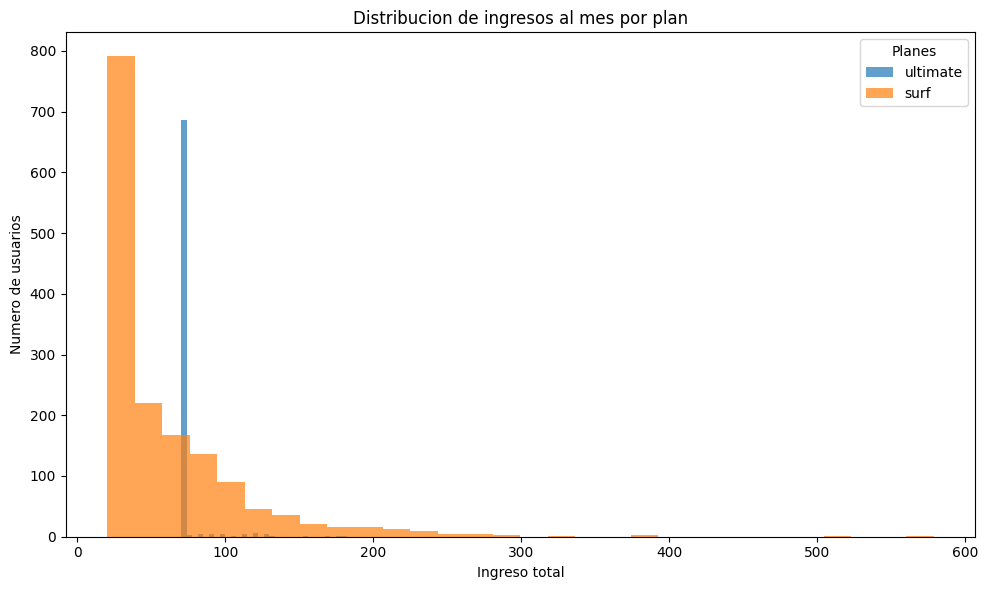

In [100]:
#Histograma 'Distribucion de trafico de internet por plan'
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plotting the histogram of messages for all users in each plan
for plan in user_plan['plan'].unique():
    # Filter the data for each plan
    plan_data_revenue = user_plan[user_plan['plan'] == plan]
    
    # Plotting the histogram for total minutes used in this plan
    plt.hist(plan_data_revenue['total_revenue'], bins=30, alpha=0.7, label=plan)

# Adding labels and title
plt.title('Distribucion de ingresos al mes por plan')
plt.xlabel('Ingreso total')
plt.ylabel('Numero de usuarios')
plt.legend(title="Planes")

# Show the plot
plt.tight_layout()
plt.show()

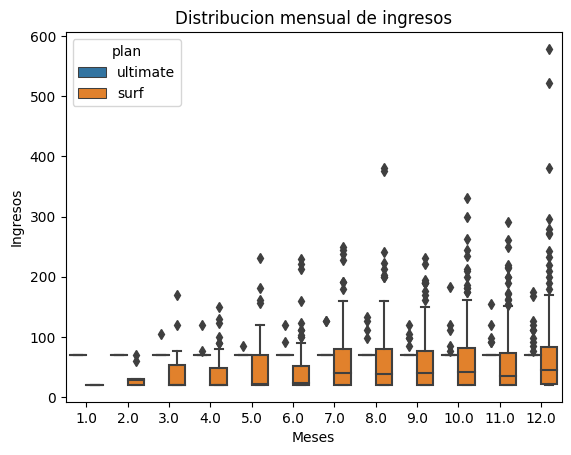

<Figure size 1000x600 with 0 Axes>

In [85]:
# Traza un diagrama de caja para visualizar la distribución mensual de trafico de internet
import seaborn as sns
sns.boxplot(x='month',y='total_revenue',hue="plan",data=user_plan)

plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.title('Distribucion mensual de ingresos')
plt.figure(figsize=[10,6])
plt.show()



[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

En base a la comparacion de:

* Ingresos por planes
* Histograma
* Boxplot

Podemos ver que los ingresos del plan surf superan a los del plan ultimate. El plan surf tuvo mayor presencia en todos los meses del año. Esto puede deberse a que el precio del plan surf es menor al del plan ultimate, y a pesar de que un usuario se exceda en el uso, ya que esta pagando nada más 20$, el exceso no sería demasiado.   

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis:

* 𝐻0 → No hay diferencia en los ingresos promedio de los planes.
* 𝐻𝑎 → Sí hay una diferencia en los ingresos promedio de los planes.

 
Prueba usada:

* Prueba t de Student para dos muestras independientes.


Nivel de significancia:

* α=0.05.


Interpretación:

* Si el valor p es menor a 0.05, hay diferencia entre los planes. Si no, no podemos afirmar que haya diferencia.

In [110]:
# Prueba las hipótesis
import scipy.stats as stats

# Filtrar ingresos por tipo de plan
ultimate_revenue = user_plan[user_plan["plan"] == "ultimate"]["total_revenue"]
surf_revenue = user_plan[user_plan["plan"] == "surf"]["total_revenue"]

# Prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio sean diferentes.")



Estadístico t: 10.6905
Valor p: 0.0000
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis:

* 𝐻0 → El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.
* 𝐻𝑎 → El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Prueba usada:

* Prueba t de Student para dos muestras independientes (asumiendo varianzas desiguales).

Nivel de significancia:

* α=0.05.

Interpretación:

* Si el valor p es menor a 0.05, rechazamos la hipótesis nula y concluimos que hay diferencia significativa entre los ingresos promedio de usuarios del área NY-NJ y otras regiones. Si el valor p es mayor o igual a 0.05, no podemos rechazar la hipótesis nula y no tenemos suficiente evidencia para afirmar que existe diferencia.

In [112]:
# Prueba las hipótesis

import pandas as pd
import numpy as np
from scipy import stats

# Assuming your DataFrame is called user_plan

# 1. Create a binary variable for NY-NJ region
# This assumes cities in NY-NJ have "New York", "NY", "New Jersey", "NJ" in their names
user_plan['is_ny_nj'] = user_plan['city'].str.contains('New York|NY|New Jersey|NJ', case=False, na=False)

# 2. Split data into two groups
ny_nj_income = user_plan[user_plan['is_ny_nj']]['usd_monthly_pay']
other_income = user_plan[~user_plan['is_ny_nj']]['usd_monthly_pay']

# 3. Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(ny_nj_income, other_income, equal_var=False)

# 4. Set alpha
alpha = 0.05

# 5. Print results
# Interpretación del resultado
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre usuarios de NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio sean diferentes entre NY-NJ y otras regiones.")


Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre usuarios de NY-NJ y otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Basándome en el análisis realizado, sí, parece razonable sugerir que Megaline debería considerar enfocar más su presupuesto publicitario en el plan Surf. Aquí están las razones principales:

* Mayor generación de ingresos totales: Los datos muestran que el plan Surf generó más ingresos totales que el plan Ultimate consistentemente durante todos los meses del año.
* Mayor base de usuarios activos: El análisis muestra que hay más usuarios del plan Surf, lo que contribuye a un mayor volumen de ingresos totales.
* Mayor actividad de uso: Los usuarios de Surf mostraron mayor actividad en mensajería y consumo de internet, lo que podría traducirse en más ingresos por servicios adicionales.
* Potencial para crecimiento: El menor precio base del plan Surf ($20) parece ser atractivo para los usuarios, quienes luego generan ingresos adicionales al exceder los límites incluidos en el plan.


A través de la prueba de hipótesis, pudimos constatar que hay una diferencia significativa en los ingresos promedio entre Ultimate y Surf. Esto valida nuestros anteriores análisis, y podemos confirmar que el plan "Surf" genera más ingresos a la compañía Megaline.

Recomendaría:

* Aumentar la inversión publicitaria en el plan Surf para atraer más usuarios, dado su atractivo precio base y su capacidad demostrada para generar ingresos.
* Continuar ofreciendo ambos planes, ya que atienden a diferentes segmentos de mercado.
* En base a nuestra segunda hipótesis, enfocarnos en ciudades grandes como New York. Ya que ahí se encuentran la mayoría de los clientes potenciales.